In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install libsvm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 7.1 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp38-cp38-linux_x86_64.whl size=233367 sha256=dfd1d205eb4256ee1feff68010e3c4e3b04c59d942a00650243c2253d7b83ff4
  Stored in directory: /root/.cache/pip/wheels/41/00/e7/b328c0f5e4bbb9ac8ba5a72e56b1749be63dc1ab1c9321fd4e
Successfully built libsvm


In [3]:
import numpy as np
import pandas as pd
from libsvm.svmutil import *
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [4]:
# read data
path_X_train = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW5_1204/ML_HW05/data/X_train.csv'
path_y_train = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW5_1204/ML_HW05/data/Y_train.csv'
path_X_test = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW5_1204/ML_HW05/data/X_test.csv'
path_y_test = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW5_1204/ML_HW05/data/Y_test.csv'

X_train = pd.read_csv(path_X_train, header=None).to_numpy()
y_train = pd.read_csv(path_y_train, header=None).to_numpy().reshape(-1)
X_test  = pd.read_csv(path_X_test, header=None).to_numpy()
y_test  = pd.read_csv(path_y_test, header=None).to_numpy().reshape(-1)

# Part1: 
Use different kernel functions (linear, polynomial, and RBF kernels) and compare their performance.

reference from https://github.com/cjlin1/libsvm

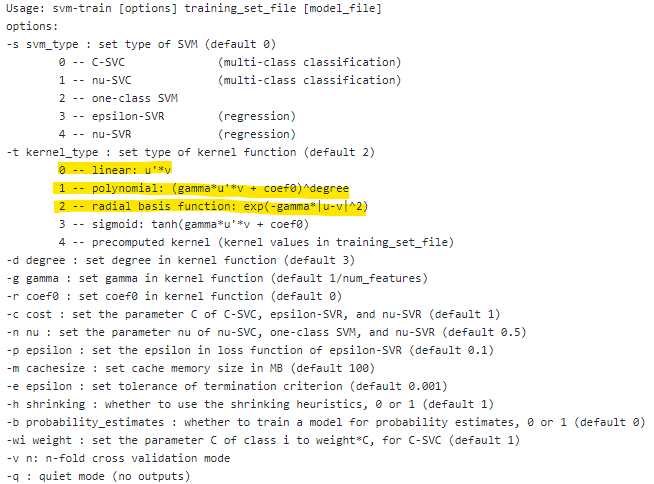


In [5]:
kernel_f_types = {'linear':'-q -t 0',
                  'polynomial':'-q -t 1',
                  'radial basis function':'-q -t 2',
                  'sigmoid':'-q -t 3'}

for k_type in kernel_f_types:
    model = svm_train(y_train, X_train, arg3=kernel_f_types[k_type])
    pre_labels, pre_acc, pre_vals = svm_predict(y_test, X_test, model, '-q')
    
    # For classification: pre_acc: a tuple including accuracy, MSE(mean-squared error) 
    # For regression: and squared correlation coefficient.
    print("kernel_type:{}, accuracy: {:.4f}".format(k_type, pre_acc[0]))

kernel_type:linear, accuracy: 95.0800
kernel_type:polynomial, accuracy: 34.6800
kernel_type:radial basis function, accuracy: 95.3200
kernel_type:sigmoid, accuracy: 94.8000


# Part2: 
•	Please use C-SVC (you can choose by setting parameters in the function input, C-SVC is soft-margin SVM).

•	Since there are someparameters you need to tune for, please do the grid search for finding parameters of the best performing model.

•	For instance, in C-SVC you have a parameter C, and if you use RBF kernel you have another parameter γ, you can search for a set of (C, γ) which gives you best performance in cross-validation.


In [6]:
def GridSearch_LinearKernel(ln_C, X_train, y_train, X_test ,y_test):
    best_lc = ln_C[0] # set initial lc as log10[0]
    best_acc= 0
    for lc in ln_C:
        arg = '-q -t 0 -v 3 -c {}'.format(10.0**lc)
        acc = svm_train(y_train, X_train, arg3=arg)

        if acc > best_acc:
            best_lc = lc
            best_acc = acc
    return best_lc, best_acc

In [7]:
# Linear
ln_C = [i for i in range(-5, 6)]  # range in -5 ~ 5
# C = [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 10000]
best_lc, best_acc = GridSearch_LinearKernel(ln_C, X_train, y_train, 
                                           X_test, y_test)
print("Best set (C)=(10^{}), accuracy:{}%".format(best_lc, best_acc))

Cross Validation Accuracy = 79.8%
Cross Validation Accuracy = 88.4%
Cross Validation Accuracy = 95.22%
Cross Validation Accuracy = 96.98%
Cross Validation Accuracy = 96.5%
Cross Validation Accuracy = 96.18%
Cross Validation Accuracy = 96.04%
Cross Validation Accuracy = 96.56%
Cross Validation Accuracy = 96%
Cross Validation Accuracy = 96%
Cross Validation Accuracy = 96.16%
Best set (C)=(10^-2), accuracy:96.98%


In [ ]:
def GridSearch_PolyKernel(ln_c, ln_g, coef_in, X_train, y_train, X_test, y_test):
    best_lc    = ln_c[0]
    best_lg    = ln_g[0]
    best_coef_in = coef_in[0] 
    best_acc   = 0
    for lc in ln_c:
        for lg in ln_g:
            for r in coef_in:
                arg = '-q -t 1 -v 3 -c {} -g {} -r {}'.format(10.0**lc, 10.0**lg, r)
                acc = svm_train(y_train, X_train, arg3=arg)

                if acc > best_acc:
                    best_lc    = lc
                    best_lg    = lg
                    best_coef0 = r
                    best_acc   = acc
    return best_lc, best_lg, best_coef_in, best_acc

In [ ]:
# Polynomial
ln_c = [i for i in range(-3,4)] #-3~3
ln_g = [i for i in range(-3,4)]
coef_in  = [-1, 0, 1]
best_lc, best_lg, best_coef_in, best_acc = GridSearch_PolyKernel(ln_c, ln_g, coef_in, X_train, y_train, X_test, y_test)
print("Best set (C, gamma, coef0)=(10^{}, 10^{}, {}), accuracy:{}%".format(best_lc, best_lg, best_coef_in, best_acc))

Cross Validation Accuracy = 82.02%
Cross Validation Accuracy = 29.2%
Cross Validation Accuracy = 77.02%
Cross Validation Accuracy = 84.78%
Cross Validation Accuracy = 28.6%
Cross Validation Accuracy = 76.1%
Cross Validation Accuracy = 92.4%
Cross Validation Accuracy = 96.2%
Cross Validation Accuracy = 97.22%
Cross Validation Accuracy = 97.46%
Cross Validation Accuracy = 97.64%
Cross Validation Accuracy = 97.52%
Cross Validation Accuracy = 97.5%
Cross Validation Accuracy = 97.44%
Cross Validation Accuracy = 97.26%
Cross Validation Accuracy = 97.4%
Cross Validation Accuracy = 97.2%
Cross Validation Accuracy = 97.3%
Cross Validation Accuracy = 97.4%
Cross Validation Accuracy = 97.28%
Cross Validation Accuracy = 97.6%
Cross Validation Accuracy = 81.84%
Cross Validation Accuracy = 28.3%
Cross Validation Accuracy = 77.22%
Cross Validation Accuracy = 89.4%
Cross Validation Accuracy = 58.92%
Cross Validation Accuracy = 94.3%
Cross Validation Accuracy = 95.7%
Cross Validation Accuracy = 97.42%


In [ ]:
def GridSearch_RBFKernel(ln_c, ln_g, X_train, y_train, X_test ,y_test):
    best_lc = ln_c[0]
    best_lg = ln_g[0]
    best_acc = 0
    for lc in ln_c:
        for lg in ln_g:
            arg3 = '-q -t 2 -v 3 -c {} -g {}'.format(10.0**lc, 10.0**lg)
            acc = svm_train(y_train, X_train, arg3=arg3)
            
            
            if acc > best_acc:
                best_lc = lc
                best_lg = lg
                best_acc = acc
    return best_lc, best_lg, best_acc

In [ ]:
# radial basis function(RBF)
ln_c = [i for i in range(-3,4)]
ln_g = [i for i in range(-3,4)]
best_c, best_g, best_accu = GridSearch_RBFKernel(ln_c, ln_g, X_train, y_train, X_test, y_test)
print("Best set (C, gamma)=(10^{}, 10^{}), accuracy:{}%".format(best_c, best_g, best_accu))

Cross Validation Accuracy = 81.1%
Cross Validation Accuracy = 89.82%
Cross Validation Accuracy = 49.8%
Cross Validation Accuracy = 20.52%
Cross Validation Accuracy = 78.8%
Cross Validation Accuracy = 35.86%
Cross Validation Accuracy = 20%
Cross Validation Accuracy = 80.98%
Cross Validation Accuracy = 91.74%
Cross Validation Accuracy = 49.3%
Cross Validation Accuracy = 21.12%
Cross Validation Accuracy = 79.06%
Cross Validation Accuracy = 35.9%
Cross Validation Accuracy = 20%
Cross Validation Accuracy = 91.88%
Cross Validation Accuracy = 96.22%
Cross Validation Accuracy = 54.1%
Cross Validation Accuracy = 20.96%
Cross Validation Accuracy = 78.88%
Cross Validation Accuracy = 35.72%
Cross Validation Accuracy = 20%
Cross Validation Accuracy = 96.02%
Cross Validation Accuracy = 97.74%
Cross Validation Accuracy = 91.16%
Cross Validation Accuracy = 31.02%
Cross Validation Accuracy = 33.46%
Cross Validation Accuracy = 36.12%
Cross Validation Accuracy = 20%
Cross Validation Accuracy = 97.04%
Cro

# Part3: 
Use linear kernel + RBF kernel together (therefore a new kernel function) and use grid search again. You would need to find out how to use a user-defined kernel in libsvm.

Reference from https://stackoverflow.com/questions/7715138/using-precomputed-kernels-with-libsvm

In [13]:
def kernel_userDef(X, X_, gamma):
    kernel_linear = X @ X_.T
    kernel_RBF = np.exp(-gamma*cdist(X, X_, 'sqeuclidean'))  # 用歐式距離 seuclidean：標準化
    kernel = kernel_linear + kernel_RBF
    kernel = np.hstack((np.arange(1, len(X)+1).reshape(-1,1), kernel))
    return kernel

In [ ]:
kernel  = kernel_userDef(X_train, X_train, 10**best_g)    # best_g: from part2
kernel_K = kernel_userDef(X_test, X_train, 10**best_g)     # best_g: from part2

probability  = svm_problem(y_train, kernel, isKernel=True)
parameter = svm_parameter('-q -t 4')
model = svm_train(probability, parameter)
pre_label, pre_acc, pre_vals = svm_predict(y_test, kernel_K, model, '-q')
print('linear kernel + RBF kernel accuracy: {:.2f}%'.format(pre_acc[0]))

linear kernel + RBF kernel accuracy: 95.32%


# Observation
1.	The penalty increases, the number of support vectors decreases, and overfitting becomes easier as C increases.
2.	When The gamma is enormous, making it is simple to identify the hyperplane that best fits the near point and simple to overfit the model.
3.	RBF outperforms the approaches in terms of performance. Due to RBF's ability to map data into spaces with unlimited dimensions, everything is linearly separable. Despite having a 784 feature space, MNIST appears complicated. SVM can make accurate classifications thanks to RBF. But this accuracy isn't perfect. This is because we only conduct a small number of parameter searches.
4.	The outcome confirms that RBF is an excellent classification kernel. For this reason, most people choose RBF as their kernel function.
5.	It is conceivable that part B will yield more significant results than part A. B is performing the identical SVM as A but with the best parameters that grid search could find.
6.	Experiments A and B demonstrate the significance of selecting appropriate parameters for various datasets.
7.	Cross-validation results may not be as good as testing results. Considering that the optimum parameters for testing data may differ from those found with training data. However, the accuracy of slice drop is tolerable.
8.	Linear kernel: No particular parameters require fine-tuning.
9.	Polynomial kernel: The most time-consuming search method since many parameters need to be fine-tuned.
10.	RBF kernel: a popular kernel function because of its superior categorization capabilities.
11.	The two most crucial parameters to fine-tune are C and gamma. The price is C. The model has less tolerance for mistakes with a higher c value. This leads to training data that is overly fitted. Gamma affects the area that RBF can project to. Gamma can support more vectors if it is smaller.
